# Get Data

In [1]:
#https://www.kaggle.com/leonardarmstrong/an-analysis-of-epicurious-recipe-data/report
#https://www.kaggle.com/leonardarmstrong/an-analysis-of-epicurious-recipe-data

#https://www.kaggle.com/leonardarmstrong/an-analysis-of-epicurious-recipe-data
#https://www.kaggle.com/hanyan/finding-pattern-in-food
#https://www.kaggle.com/piushvaish/nutritional-information-in-recipes
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Used to see all column names in output display
pd.set_option('display.max_columns', 500)

In [3]:
recipe_data = pd.read_json('full_format_recipes.json')

## Initial Understanding

In [4]:
# recipe_data.iloc[:10,:]

In [5]:
# print(recipe_data['title'][0])
# recipe_data['categories'][0]

In [6]:
# recipe_data['directions'][0]

In [7]:
# recipe_data['ingredients'][0]

## Data Exploration & Initial Processing

### Check column types

In [8]:
# recipe_data.dtypes

### Null values
- I will not be including desc throughout my analysis so I'll drop that column.
- If I remove all the remaining nulls, i'll have about 80% of the originial dataset.

In [7]:
# recipe_data.isna().sum()
# cookbook.shape #20,130 rows x 11 columns

calories       4154
categories       19
date             19
desc           6635
directions       19
fat            4222
ingredients      19
protein        4201
rating           30
sodium         4156
title            19
dtype: int64

In [4]:
recipe_data = recipe_data[recipe_data['rating'].notnull()]
# recipe_data.isna().sum()

# Build Features

In [5]:
recipe_data['has_desc'] = np.where(recipe_data['desc'], 1, 0)
recipe_data = recipe_data.drop(['desc'], axis=1)
recipe_data['n_directions'] = recipe_data['directions'].apply(len)
recipe_data['n_ingredients'] = recipe_data['ingredients'].apply(len)

In [6]:
recipe_data['rating_rounded'] = recipe_data['rating'].apply(lambda x: round(x))

In [7]:
recipe_data = recipe_data.dropna()
recipe_data = recipe_data.reset_index(drop=True)
recipe_data.isna().sum()
# recipe_data.head()
recipe_data.shape #15,896 rows X 13 columns

(15896, 14)

In [14]:
# existing_categories = set()
# for cat_list in recipe_data['categories']:
#     for cat_word in cat_list:
#         existing_categories.add(cat_word.lower())
# len(existing_categories) #returned 662
# # recipe_data.head()

In [15]:
# actual_categories = set()
# for row in range(len(recipe_data)):
#     for ing_list in recipe_data['ingredients'][row]:
#         for word in existing_categories:
#             if word in ing_list.lower():
#                 actual_categories.add(word)
# len(actual_categories) #returned 462

In [16]:
# for row in range(len(recipe_data)):
#     for dir_list in recipe_data['directions'][row]:
#         for word in existing_categories:
#             if word in dir_list.lower():
#                 actual_categories.add(word)
# len(actual_categories) #returned 491

In [17]:
# for row in range(len(recipe_data)):
#     for title in recipe_data['title'][row]:
#         for word in existing_categories:
#             if word in title.lower():
#                 actual_categories.add(word)
# len(actual_categories) #returned 491

In [18]:
# not_included_categories = existing_categories.difference(actual_categories)
# not_included_categories

In [19]:
# sorted_categories = list(actual_categories)
# sorted_categories.sort()

In [20]:
# for row in range(5): #len(recipe_data)    
#     ingredients = recipe_data['ingredients']
#     directions = recipe_data['directions']
#     titles = recipe_data['title'][row].replace(',','').split()
#     new_cat = list()
#     
#     for title in titles:
#         for word in sorted_categories:
#             if word == title.lower():
#                 new_cat.append(word)
#     print(new_cat)
#                 print(word, k)
#     for ingredient in ingredients[row]:
#         ingredient_word = ingredient.replace(',', '').split()
#         for ing_word in ingredient_word:
#             for word in actual_categories:
#                 if word == ing_word.lower():
#                     new_cat.add(word)
#                     break
#     for direction in directions[row]:
#         direction_word = direction.replace(',', '').split()
#         for dir_word in direction_word:
#             for word in actual_categories:
#                 if word == dir_word.lower():
#                     new_cat.add(word)
#                     break
#     print(new_cat)

In [21]:
# import time
# import csv
# start = time.time()

# fieldnames = ['title']
# def get_tags(fieldnames, data, sorted_categories):
#     fn = fieldnames.copy()
#     length = 1+len(sorted_categories)
#     actual_categories = list(sorted_categories)
#     for tag in sorted_categories:
#         fn.append(tag)
#     DF = pd.DataFrame()
#     for row in range(len(recipe_data)): #len(recipe_data) #Get the data out with the associated column name
#         recipedata = list([0]*length)
#         recipedata[0] = recipe_data['title'][row]
#         ingredients = recipe_data['ingredients']
#         directions = recipe_data['directions']
#         titles = recipe_data['title'][row].replace(',','').split()
#         i=1
#         j=1
#         k=1
#         for word in sorted_categories:
#             for ingredient in ingredients[row]:
#                 ingredient_word = ingredient.replace(',', '').split()
#                 ingredient_word.sort()
#                 for ing_word in ingredient_word:
#                     if ing_word.lower() == word:
#     #                         print(word,i)
#                         recipedata[i] = 1
#                         break
#             for direction in directions[row]:
#                 direction_word = direction.replace(',', '').split()
#                 direction_word.sort()
#                 for dir_word in direction_word:
#                     if word == dir_word.lower():
#                         recipedata[j] = 1
#                         break
#             for title in titles:
#                 if word == title.lower():
#                     recipedata[k] = 1
#                     break
#             i = i+1
#             j = j+1
#             k = k+1        
#         df_temp = pd.DataFrame(data = np.array(recipedata).reshape((1,len(fn))), columns= fn)
#         DF = DF.append(df_temp, ignore_index = True)
#     return DF
  
# cookbook_tags = get_tags(fieldnames, recipe_data, sorted_categories)
# end = time.time()
# print(end-start)


# cookbook_tags.to_pickle('tags.pkl')

# Import Data from Pickle

In [63]:
import pickle
infile = open('tags.pkl', 'rb')
tags = pickle.load(infile)
infile.close()

In [64]:
recipe_info = recipe_data[['title', 'rating', 'rating_rounded', 'calories', 'fat', 'protein', 'sodium', 'has_desc', 'n_directions', 'n_ingredients']]
full = recipe_info.merge(tags, on='title')

In [13]:
# full.head()

,title,calories,fat,protein,sodium,rating,rating_rounded,has_desc,n_directions,n_ingredients,alaska,alcoholic,almond,amaretto,anchovy,anise,aperitif,appetizer,apple,apple juice,apricot,artichoke,arugula,asian pear,asparagus,avocado,bacon,bake,banana,barley,basil,bass,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brown rice,brownie,brussel sprout,buffalo,buffet,bulgur,burrito,butter,buttermilk,butternut squash,cabbage,cake,california,calvados,campari,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,cilantro,cinnamon,citrus,clam,clove,cocktail,coconut,cod,coffee,coffee grinder,collard greens,colorado,condiment,cookie,cookies,coriander,corn,cornmeal,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,date,deep-fry,denver,dessert,dill,dinner,dip,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,egg,eggplant,endive,escarole,fall,fat free,fennel,feta,fig,fish,flat bread,florida,fontina,food processor,france,frangelico,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,gin,ginger,goat cheese,goose,gouda,gourmet,grains,granola,grape,grapefruit,grappa,green bean,grill,ground beef,ground lamb,guava,halibut,ham,hamburger,hawaii,hazelnut,healthy,herb,honey,honeydew,hors d'oeuvre,horseradish,hot pepper,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,israel,italy,jalapeño,jam or jelly,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kentucky,kirsch,kiwi,kosher,kosher for passover,kumquat,lamb,lamb chop,lamb shank,lasagna,leafy green,leek,leftovers,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,los angeles,louisiana,...,low sodium,low sugar,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,margarita,marinade,marinate,marsala,marshmallow,martini,maryland,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,michigan,microwave,midori,mint,mixer,molasses,monterey jack,mortar and pestle,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nectarine,new mexico,new year's eve,new york,no sugar added,no-cook,non-alcoholic,noodle,nut,nutmeg,oat,oatmeal,octopus,okra,olive,omelet,onion,orange,orange juice,oregano,oregon,organic,orzo,oyster,pan-fry,pancake,papaya,paprika,parmesan,parsley,parsnip,party,passion fruit,passover,pasta,pasta maker,pastry,pea,peach,peanut,peanut butter,pear,pecan,pennsylvania,pepper,pernod,persimmon,peru,pickles,picnic,pie,pine nut,pineapple,pistachio,pizza,plantain,plum,poach,poblano,pomegranate,pomegranate juice,poppy,pork,pork chop,pork rib,pork tenderloin,port,pot pie,potato,potato salad,poultry,poultry sausage,pressure cooker,prosciutto,prune,pumpkin,punch,quail,quiche,quince,quinoa,rabbit,rack of lamb,radicchio,radish,raisin,ramekin,raspberry,raw,red wine,rhubarb,rice,ricotta,roast,root vegetable,rosemary,rub,rum,rutabaga,rye,saffron,sage,sake,salad,salad dressing,salmon,salsa,sandwich,sangria,santa monica,sardine,sauce,sausage,sauté,scallop,scotch,seafood,seed,self,semolina,sesame,sesame oil,shallot,shellfish,sherry,shower,shrimp,side,simmer,skewer,slow cooker,smoker,smoothie,snack,snapper,sorbet,sour cream,sourdough,soy,soy sauce,spain,sparkling wine,spice,spinach,spirit,spring,squash,squid,st. louis,steak,steam,stew,stir-fry,stock,strawberry,sugar snap pea,summer,swiss cheese,switzerland,swordfish,taco,tamarind,tangerine,tapioca,tarragon,tart,tea,tennessee,tequila,texas,thanksgiving,thyme,tilapia,tofu,tomatillo,tomato,tortillas,triple sec,tropical fruit,trout,tuna,turkey,turnip,vanilla,veal,vega

# Visualizations
Want to explore:
- distribution of ratings
- nutrition metrics
- occurances of tags or ingredients

Relationships between:
- ingredients & nutrition
- instructions

Text(0.5,1,'Correlation between rating & nutrition features of recipes')

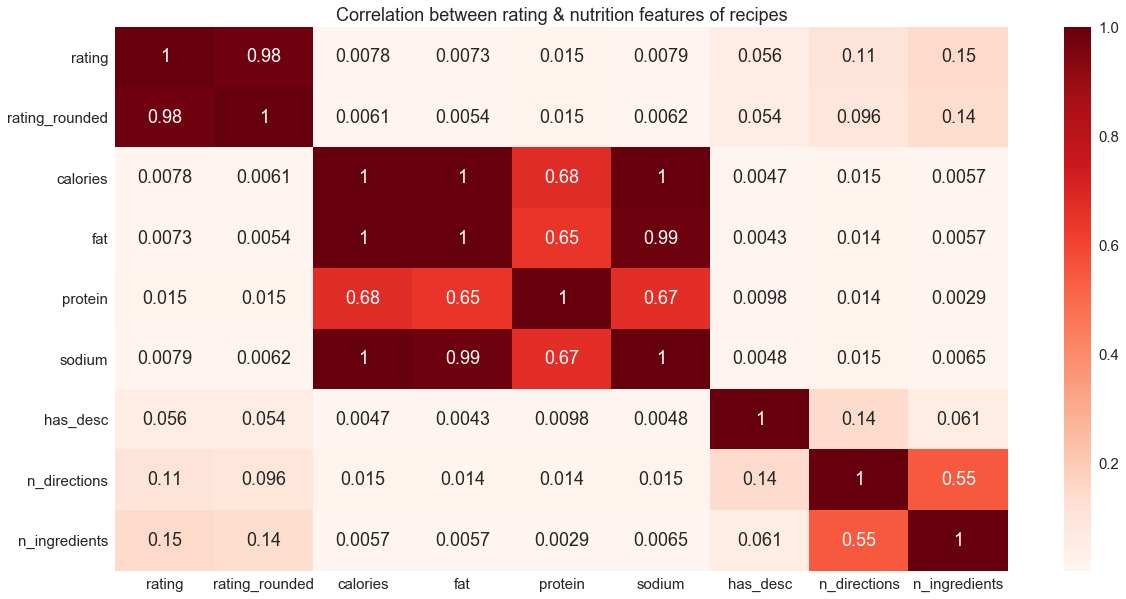

In [65]:
correlation = full.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, vmax=1, square=False,annot=True,cmap='Reds')
plt.title('Correlation between rating & nutrition features of recipes')

Text(0.5,1,'Distribution of recipe ratings')

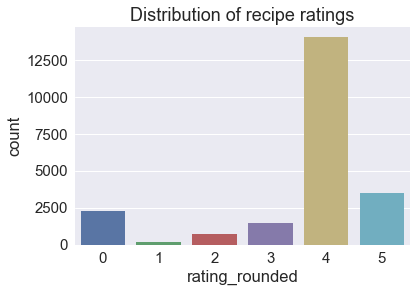

In [82]:
sns.countplot(x=full.rating_rounded)
plt.title('Distribution of recipe ratings')

Text(0.5,1,'Distribution of number of directions')

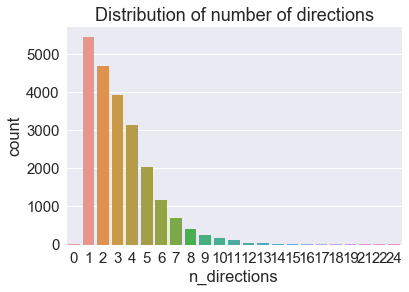

In [69]:
sns.countplot(x=full.n_directions)
plt.title('Distribution of number of directions')

Text(0.5,1,'Distribution of number of ingredients')

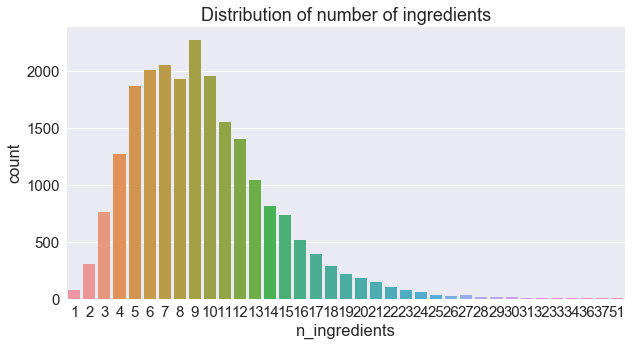

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(x=full.n_ingredients)
plt.title('Distribution of number of ingredients')

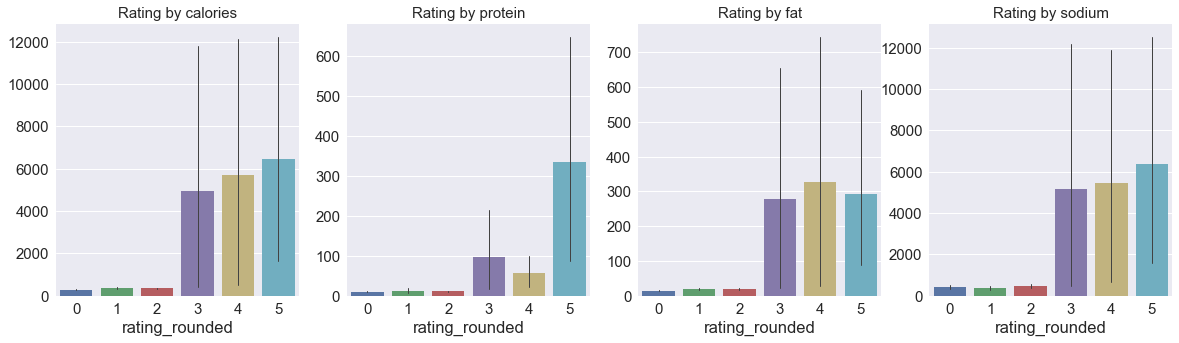

In [48]:
dict_plt = {0:'calories',1:'protein',2:'fat',3:'sodium'}

sns.set(font_scale=1.5)

fig, ax = plt.subplots(1,4, figsize=(20,5))

for i in range(4):
    sns.barplot(x='rating_rounded',y=dict_plt[i], data=full, ax=ax[i], errwidth=1)
    ax[i].set_title('Rating by {}'.format(dict_plt[i]), size=15)
    ax[i].set_ylabel('')

In [36]:
# full.describe()

,calories,fat,protein,sodium,rating,rating_rounded,has_desc,n_directions,n_ingredients
count,2.218200e+04,2.218200e+04,22182.000000,2.218200e+04,22182.000000,22182.000000,22182.000000,22182.000000,22182.000000
mean,5.015200e+03,2.737615e+02,96.232215,4.862500e+03,3.702974,3.598278,0.657650,3.243801,9.441259
std,3.068702e+05,1.742961e+04,3950.387315,2.840625e+05,1.406752,1.377445,0.474507,2.267288,4.512095
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.650000e+02,5.000000e+00,2.000000,6.600000e+01,3.750000,4.000000,0.000000,2.000000,6.000000
50%,2.870000e+02,1.500000e+01,6.000000,2.280000e+02,4.375000,4.000000,1.000000,3.000000,9.000000
75%,5.247500e+02,3.000000e+01,20.000000,6.100000e+02,4.375000,4.000000,1.000000,4.000000,12.000000
max,3.011122e+07,1.722763e+06,236489.000000,2.767511e+07,5.000000,5.000000,1.000000,24.000000,51.000000


# Modeling
- How do you handle imbalanced data in classification

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Scale dataset
model_data = full.iloc[:,1:]
model_data.apply(lambda x: pd.to_numeric(x))
ss = StandardScaler()
ss.fit_transform(model_data)

# Split data into train and test
train, test = train_test_split(model_data, test_size = 0.2, random_state = 53)

C:\Users\presc\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\presc\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [101]:
# !pip install mlxtend  
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

association_rules = apriori(train, min_support=0.03)
association_results = list(association_rules)
print(len(association_rules))

TypeError: '<' not supported between instances of 'str' and 'float'

In [105]:
#K means Clustering 
def doKmeans(X, nclust=5):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(train, 5)
kmeans = pd.DataFrame(clust_labels)
train.insert((train.shape[1]),'kmeans1',kmeans)

In [106]:
train.head()

,rating,rating_rounded,calories,fat,protein,sodium,has_desc,n_directions,n_ingredients,alaska,alcoholic,almond,amaretto,anchovy,anise,aperitif,appetizer,apple,apple juice,apricot,artichoke,arugula,asian pear,asparagus,avocado,bacon,bake,banana,barley,basil,bass,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brown rice,brownie,brussel sprout,buffalo,buffet,bulgur,burrito,butter,buttermilk,butternut squash,cabbage,cake,california,calvados,campari,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,cilantro,cinnamon,citrus,clam,clove,cocktail,coconut,cod,coffee,coffee grinder,collard greens,colorado,condiment,cookie,cookies,coriander,corn,cornmeal,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,date,deep-fry,denver,dessert,dill,dinner,dip,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,egg,eggplant,endive,escarole,fall,fat free,fennel,feta,fig,fish,flat bread,florida,fontina,food processor,france,frangelico,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,gin,ginger,goat cheese,goose,gouda,gourmet,grains,granola,grape,grapefruit,grappa,green bean,grill,ground beef,ground lamb,guava,halibut,ham,hamburger,hawaii,hazelnut,healthy,herb,honey,honeydew,hors d'oeuvre,horseradish,hot pepper,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,israel,italy,jalapeño,jam or jelly,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kentucky,kirsch,kiwi,kosher,kosher for passover,kumquat,lamb,lamb chop,lamb shank,lasagna,leafy green,leek,leftovers,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,los angeles,louisiana,low fat,...,low sugar,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,margarita,marinade,marinate,marsala,marshmallow,martini,maryland,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,michigan,microwave,midori,mint,mixer,molasses,monterey jack,mortar and pestle,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nectarine,new mexico,new year's eve,new york,no sugar added,no-cook,non-alcoholic,noodle,nut,nutmeg,oat,oatmeal,octopus,okra,olive,omelet,onion,orange,orange juice,oregano,oregon,organic,orzo,oyster,pan-fry,pancake,papaya,paprika,parmesan,parsley,parsnip,party,passion fruit,passover,pasta,pasta maker,pastry,pea,peach,peanut,peanut butter,pear,pecan,pennsylvania,pepper,pernod,persimmon,peru,pickles,picnic,pie,pine nut,pineapple,pistachio,pizza,plantain,plum,poach,poblano,pomegranate,pomegranate juice,poppy,pork,pork chop,pork rib,pork tenderloin,port,pot pie,potato,potato salad,poultry,poultry sausage,pressure cooker,prosciutto,prune,pumpkin,punch,quail,quiche,quince,quinoa,rabbit,rack of lamb,radicchio,radish,raisin,ramekin,raspberry,raw,red wine,rhubarb,rice,ricotta,roast,root vegetable,rosemary,rub,rum,rutabaga,rye,saffron,sage,sake,salad,salad dressing,salmon,salsa,sandwich,sangria,santa monica,sardine,sauce,sausage,sauté,scallop,scotch,seafood,seed,self,semolina,sesame,sesame oil,shallot,shellfish,sherry,shower,shrimp,side,simmer,skewer,slow cooker,smoker,smoothie,snack,snapper,sorbet,sour cream,sourdough,soy,soy sauce,spain,sparkling wine,spice,spinach,spirit,spring,squash,squid,st. louis,steak,steam,stew,stir-fry,stock,strawberry,sugar snap pea,summer,swiss cheese,switzerland,swordfish,taco,tamarind,tangerine,tapioca,tarragon,tart,tea,tennessee,tequila,texas,thanksgiving,thyme,tilapia,tofu,tomatillo,tomato,tortillas,triple sec,tropical fruit,trout,tuna,turkey,turnip,vanilla,veal,vegan,vegetab

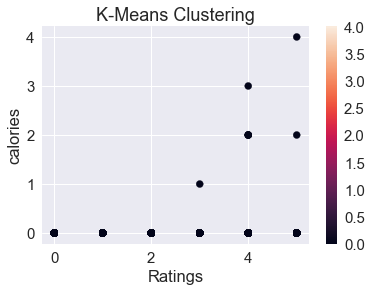

In [107]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(train['rating_rounded'],train['kmeans1'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Ratings')
ax.set_ylabel('calories')
plt.colorbar(scatter)

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
model(clf, train, test)
featimp = pd.Series(clf.feature_importances_, index=train.columns).sort_values(ascending=False)
print(featimp) 

NameError: name 'model' is not defined

In [78]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [80]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(train, test)
ypred = model.predict(test)

TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(model_data, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [50]:
mergings = linkage(model_data, method='complete')
dendrogram(mergings)
plt.show()

KeyboardInterrupt: 

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000021E427F29D8> (for post_execute):


ValueError: object too deep for desired array

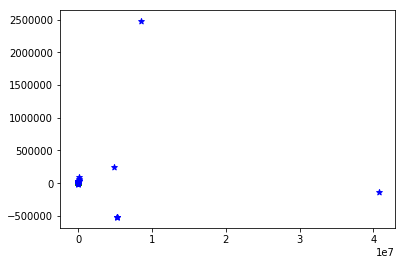

In [51]:
dbscan = DBSCAN()
dbscan = dbscan.fit(model_data)
pca = PCA(n_components=2).fit(model_data)
pca_2d = pca.transform(model_data)

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()